 Importation des bibliothèques nécessaires

In [1]:
import os
import cv2
import numpy as np
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Chargement des images et application de ELA

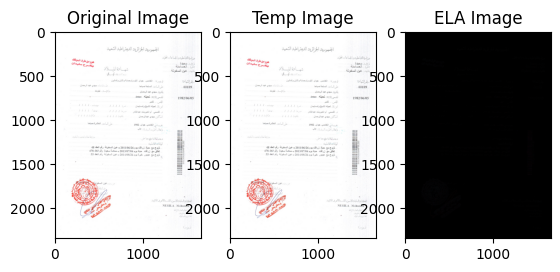

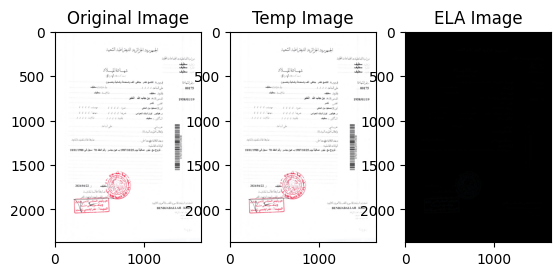

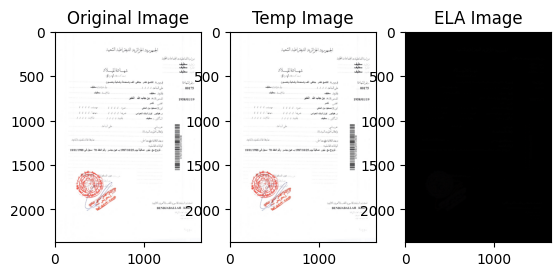

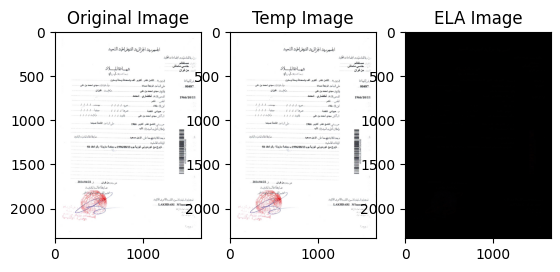

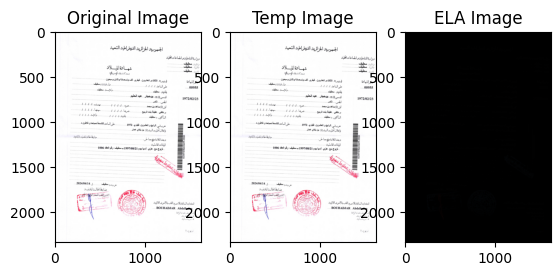

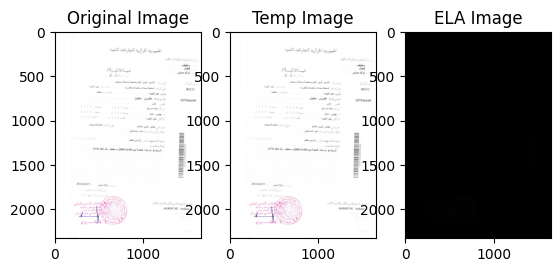

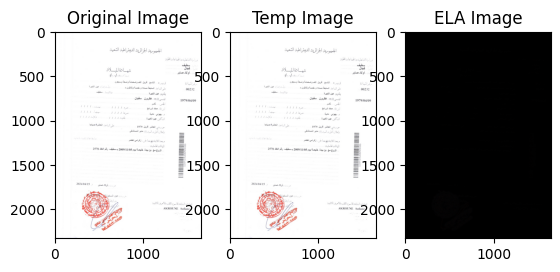

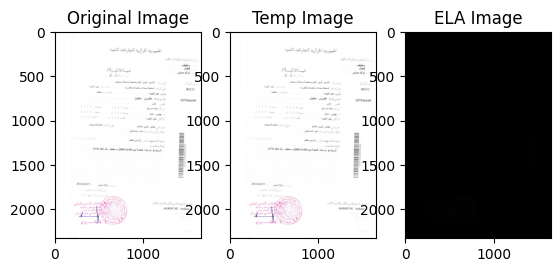

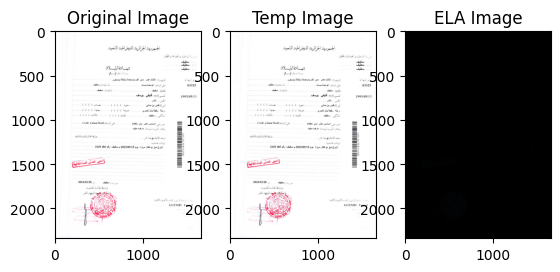

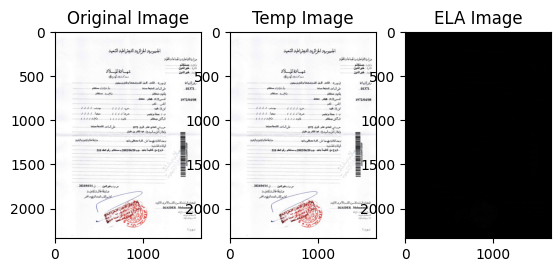

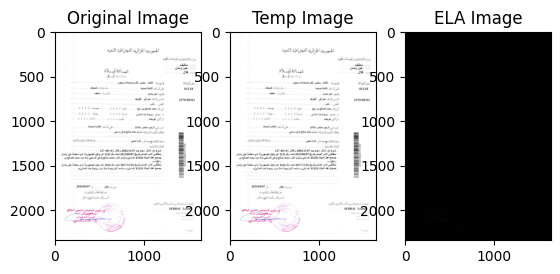

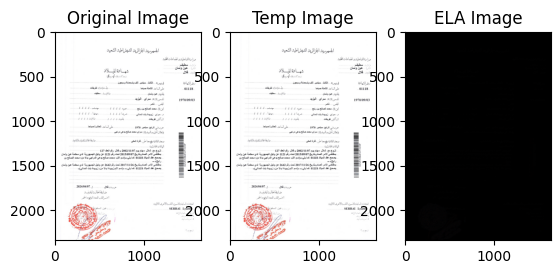

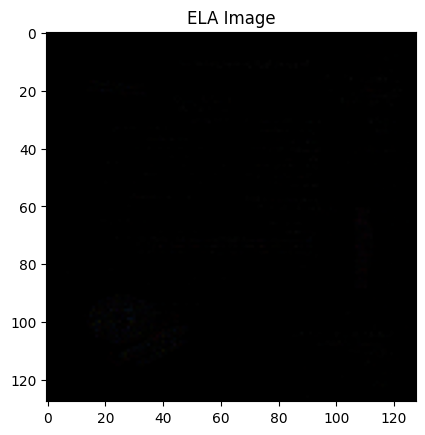

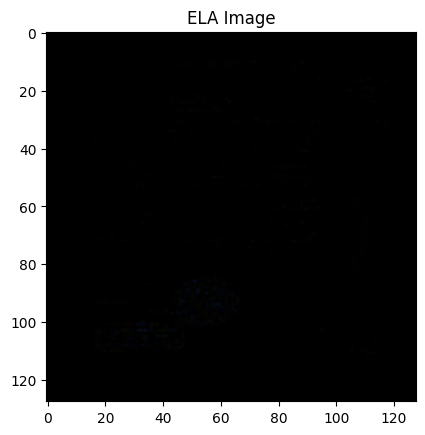

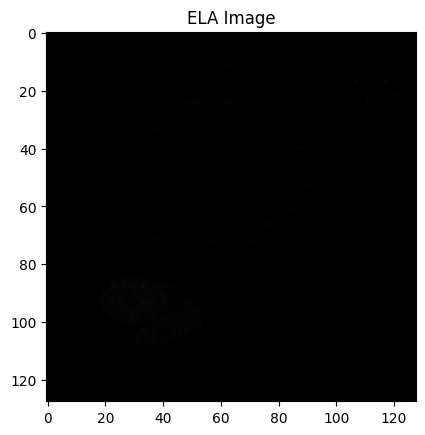

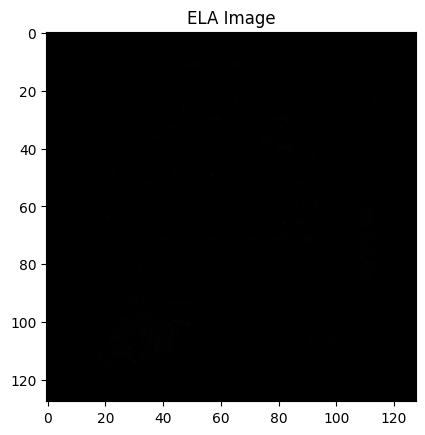

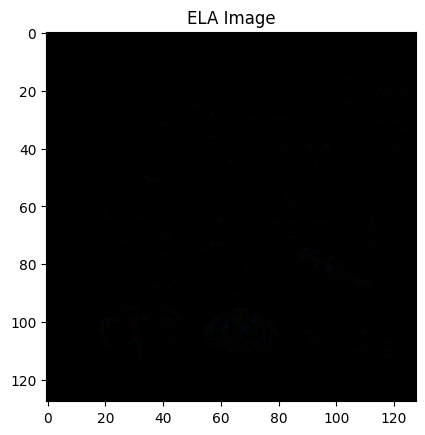

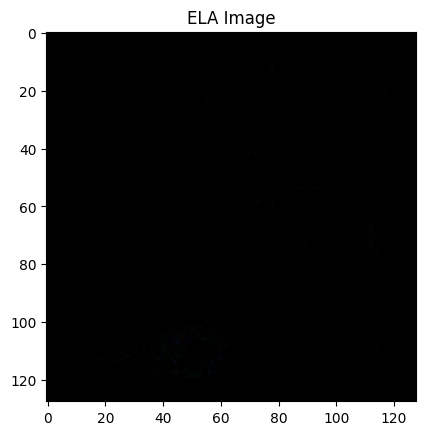

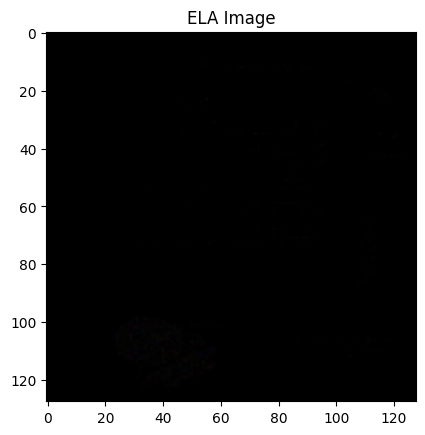

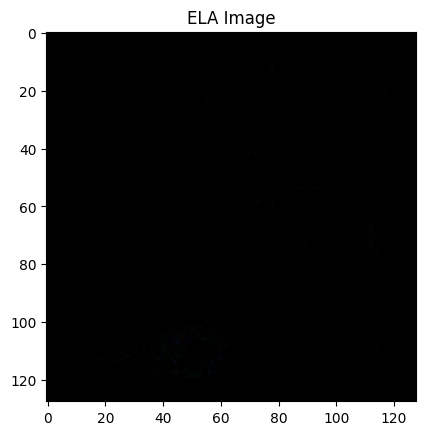

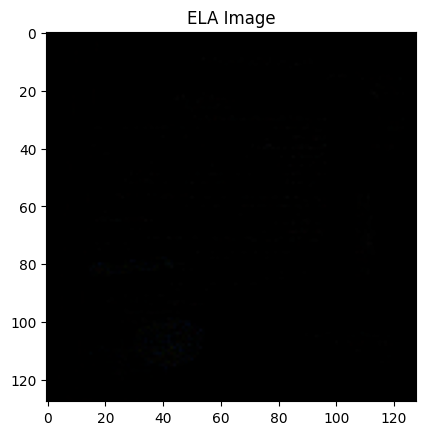

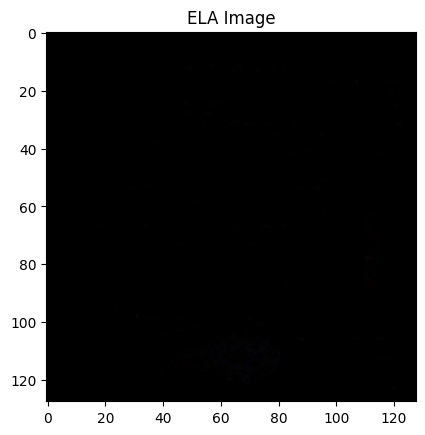

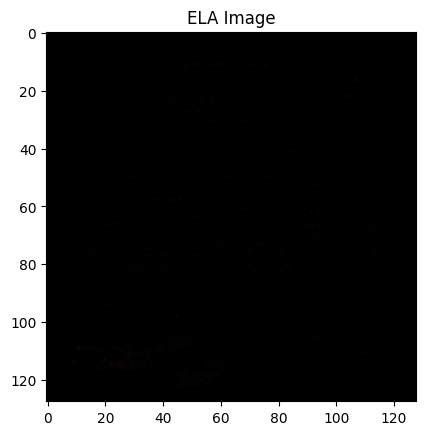

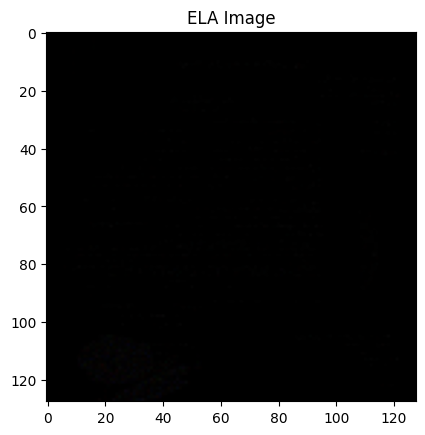

In [7]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

def ela(image_path, quality=90):
    # Charger l'image d'origine
    original_image = cv2.imread(image_path)
    
    # Enregistrer l'image temporaire avec une qualité spécifique pour ELA
    temp_filename = "temp.jpg"
    cv2.imwrite(temp_filename, original_image, [cv2.IMWRITE_JPEG_QUALITY, quality])
    
    # Charger l'image temporaire
    temp_image = cv2.imread(temp_filename)
    
    # Supprimer l'image temporaire
    os.remove(temp_filename)
    
    # Calculer l'image ELA
    ela_image = cv2.absdiff(original_image, temp_image)
    
    # Afficher les images pour débogage
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(temp_image, cv2.COLOR_BGR2RGB))
    plt.title('Temp Image')
    
    plt.subplot(1, 3, 3)
    plt.imshow(ela_image)
    plt.title('ELA Image')
    
    plt.show()
    
    return ela_image

# Chemin vers le dossier contenant les images
image_folder = r"C:\Users\berra\Desktop\Stage\images_extraits_suspects"

images = []
labels = []

# Parcours de chaque image dans le dossier
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(image_folder, filename)
        ela_image = ela(image_path)
        ela_image = cv2.resize(ela_image, (128, 128))
        images.append(ela_image)
        label = filename.split("_")[0]  # Supposons que le label soit le premier mot avant '_'
        labels.append(label)

# Convertir les listes en tableaux numpy
images = np.array(images) / 255.0
labels = np.array(labels)

# Encoder les étiquettes
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

# Afficher toutes les images ELA pour vérification
for ela_image in images:
    plt.imshow(ela_image)
    plt.title('ELA Image')
    plt.show()

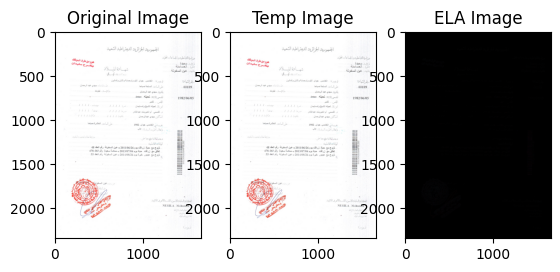

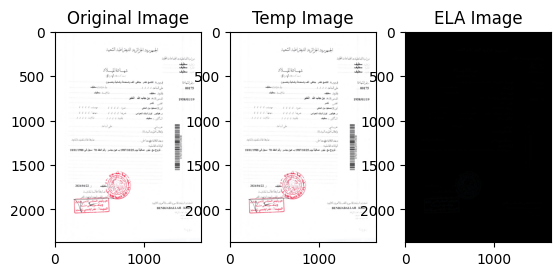

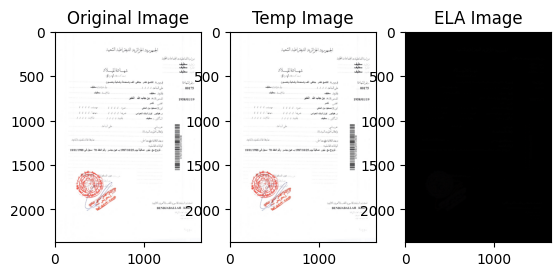

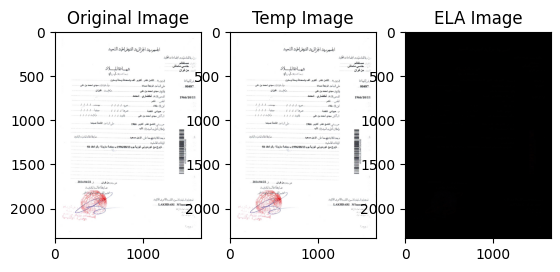

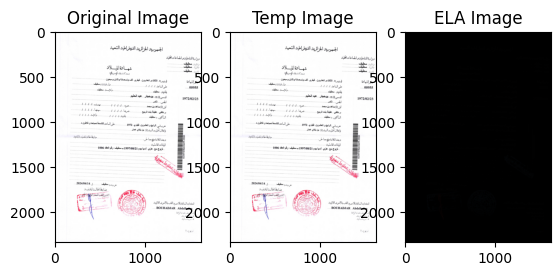

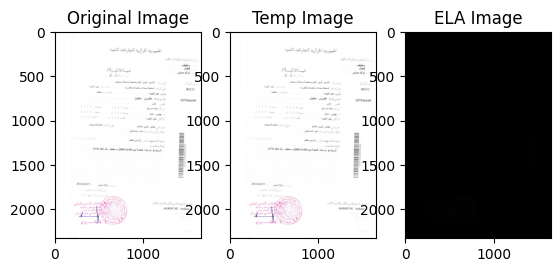

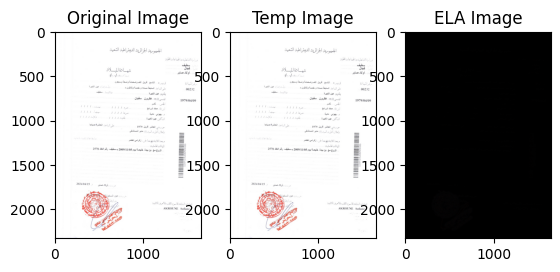

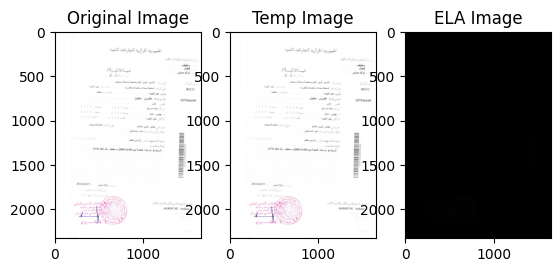

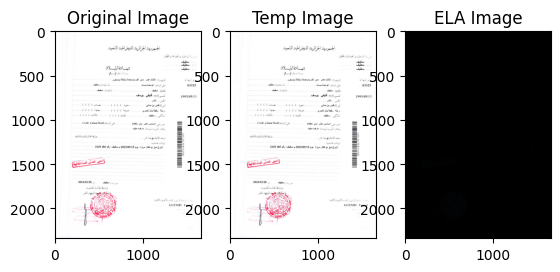

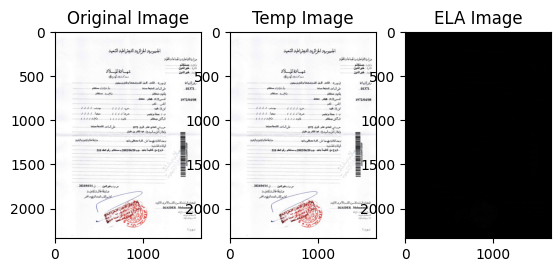

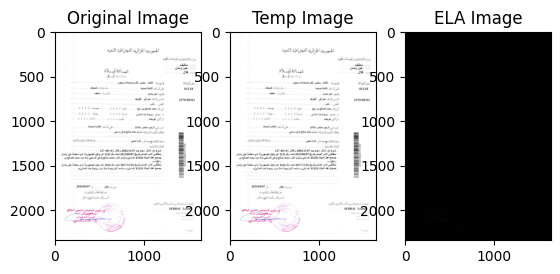

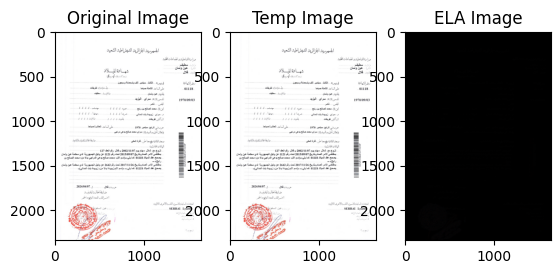

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Image 1: Pas de fraude détectée avec une probabilité de 98.83%
Image 2: Pas de fraude détectée avec une probabilité de 52.36%
Image 3: Pas de fraude détectée avec une probabilité de 98.68%
Image 4: Pas de fraude détectée avec une probabilité de 94.52%
Image 5: Pas de fraude détectée avec une probabilité de 95.56%
Image 6: Fraude détectée avec une probabilité de 99.63%
Image 7: Fraude détectée avec une probabilité de 97.94%
Image 8: Fraude détectée avec une probabilité de 99.63%
Image 9: Pas de fraude détectée avec une probabilité de 89.01%
Image 10: Pas de fraude détectée avec une probabilité de 64.34%
Image 11: Pas de fraude détectée avec une probabilité de 95.76%
Image 12: Pas de fraude détectée avec une probabilité de 96.12%


In [29]:
# Chemin du dossier contenant les images suspects
image_folder = r"C:\Users\berra\Desktop\Stage\images_extraits_suspects"
images = []

# Parcourir les images du dossier et appliquer ELA
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(image_folder, filename)
        ela_image = ela(image_path)
        ela_image = cv2.resize(ela_image, (128, 128))
        images.append(ela_image)

# Convertir les images en tableau numpy et normaliser
images = np.array(images) / 255.0

# Charger le modèle CNN pré-entraîné
model = load_model('modele_fraude.h5')

# Effectuer des prédictions sur les images prétraitées
predictions = model.predict(images)

# Afficher les prédictions pour chaque image
for i, prediction in enumerate(predictions):
    if prediction > 0.5:
        print(f"Image {i+1}: Fraude détectée avec une probabilité de {prediction[0]*100:.2f}%")
    else:
        print(f"Image {i+1}: Pas de fraude détectée avec une probabilité de {100-prediction[0]*100:.2f}%")

Image: birth_act (1)_1.jpg, Différence moyenne: 0.3212506541808381
Image: birth_act (2)_1.jpg, Différence moyenne: 0.25983213213444856
Image: birth_act (2)_11.jpg, Différence moyenne: 0.2659577750522605
Image: birth_act (3)_1.jpg, Différence moyenne: 0.18962570528051892
Image: birth_act (4)_1.jpg, Différence moyenne: 0.299771849685569
Image: birth_act (5)_1.jpg, Différence moyenne: 0.18718918294161013
Image: birth_act (5)_11.jpg, Différence moyenne: 0.22645452317782414
Image: birth_act (6)_1.jpg, Différence moyenne: 0.18718918294161013
Image: birth_act (7)_1.jpg, Différence moyenne: 0.2380552072671775
Image: birth_act (8)_1.jpg, Différence moyenne: 0.25147147991364016
Image: birth_act (9)_1.jpg, Différence moyenne: 0.2562212934254823
Image: birth_act (9)_11.jpg, Différence moyenne: 0.314789426008124


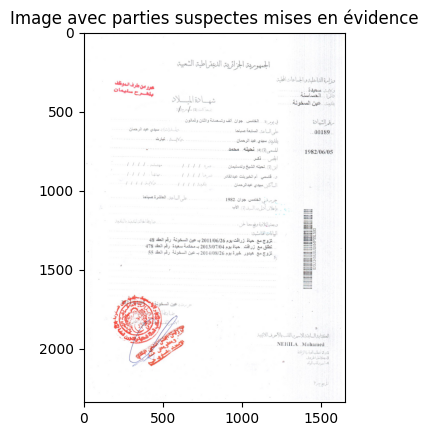

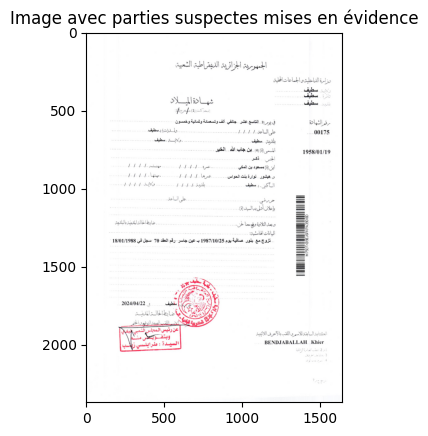

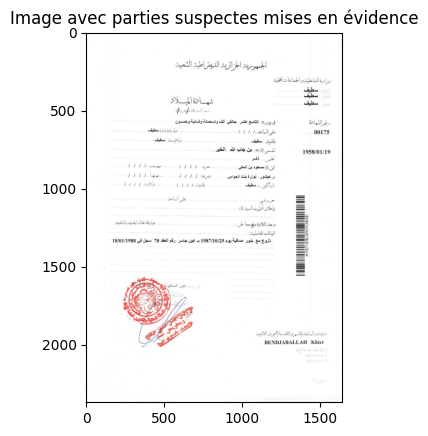

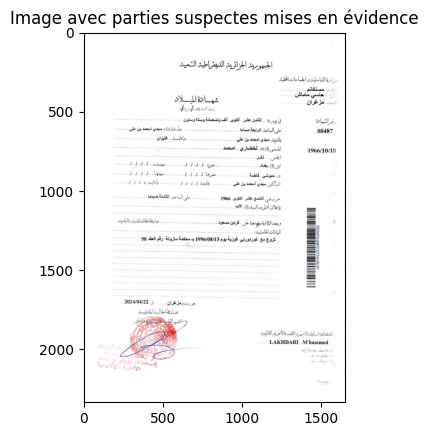

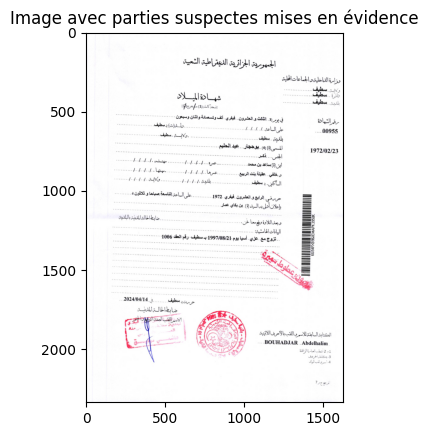

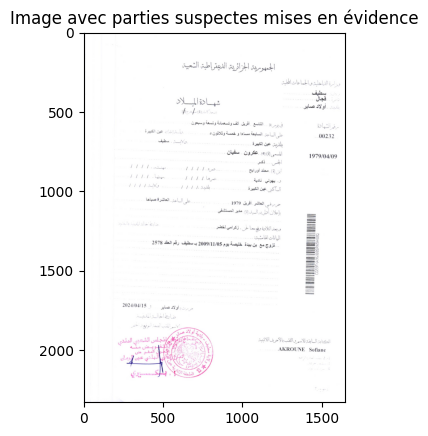

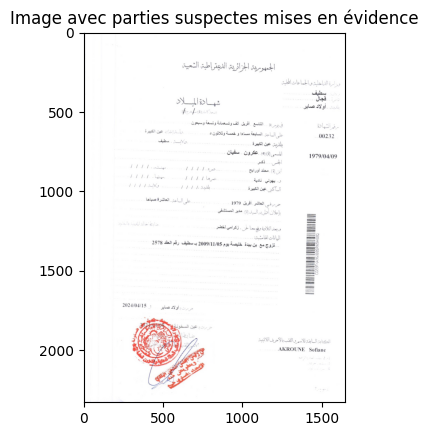

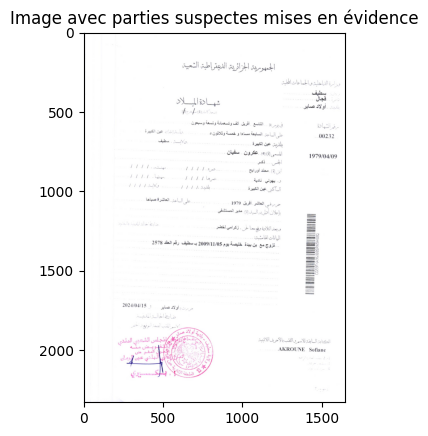

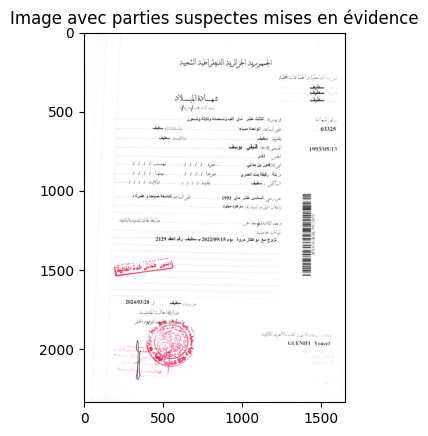

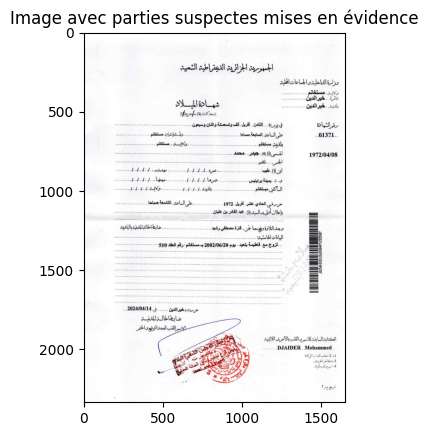

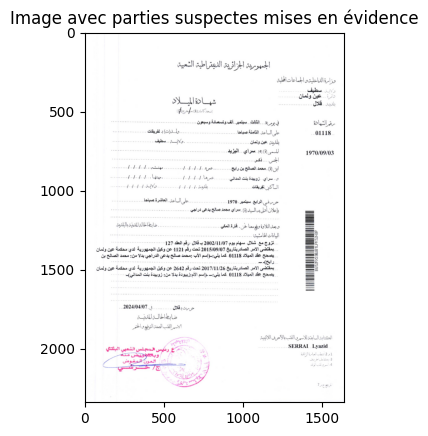

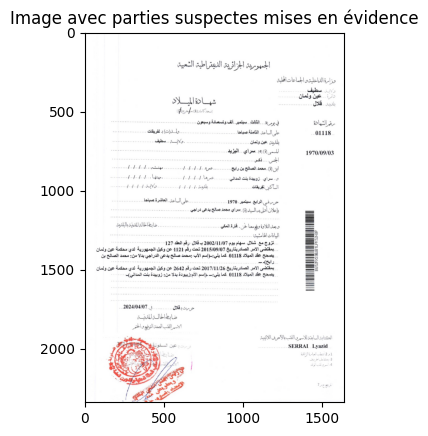

In [36]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def ela(image_path, quality=90):
    temp_filename = "temp.jpg"
    original_image = cv2.imread(image_path)
    cv2.imwrite(temp_filename, original_image, [cv2.IMWRITE_JPEG_QUALITY, quality])
    temp_image = cv2.imread(temp_filename)
    os.remove(temp_filename)
    ela_image = cv2.absdiff(original_image, temp_image)
    return ela_image

def highlight_fraud(image, ela_image, threshold=50):
    ela_gray = cv2.cvtColor(ela_image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(ela_gray, threshold, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    result = image.copy()
    cv2.drawContours(result, contours, -1, (0, 0, 255), 2)
    return result

image_folder = r"C:\Users\berra\Desktop\Stage\images_extraits_suspects"

fraudulent_images = []

for filename in os.listdir(image_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(image_folder, filename)
        ela_image = ela(image_path)
        diff_mean = np.mean(ela_image)
        print(f"Image: {filename}, Différence moyenne: {diff_mean}")
        if diff_mean > 0.05:
            fraudulent_images.append(image_path)

for fraudulent_image_path in fraudulent_images:
    image = cv2.imread(fraudulent_image_path)
    ela_image = ela(fraudulent_image_path)
    image_highlighted = highlight_fraud(image, ela_image)
    plt.imshow(cv2.cvtColor(image_highlighted, cv2.COLOR_BGR2RGB))
    plt.title('Image avec parties suspectes mises en évidence')
    plt.show()

Chemins des images :
C:\Users\berra\Desktop\Stage\images_extraits_suspects\birth_act (1)_1.jpg
C:\Users\berra\Desktop\Stage\images_extraits_suspects\birth_act (2)_1.jpg
C:\Users\berra\Desktop\Stage\images_extraits_suspects\birth_act (2)_11.jpg
C:\Users\berra\Desktop\Stage\images_extraits_suspects\birth_act (3)_1.jpg
C:\Users\berra\Desktop\Stage\images_extraits_suspects\birth_act (4)_1.jpg
C:\Users\berra\Desktop\Stage\images_extraits_suspects\birth_act (5)_1.jpg
C:\Users\berra\Desktop\Stage\images_extraits_suspects\birth_act (5)_11.jpg
C:\Users\berra\Desktop\Stage\images_extraits_suspects\birth_act (6)_1.jpg
C:\Users\berra\Desktop\Stage\images_extraits_suspects\birth_act (7)_1.jpg
C:\Users\berra\Desktop\Stage\images_extraits_suspects\birth_act (8)_1.jpg
C:\Users\berra\Desktop\Stage\images_extraits_suspects\birth_act (9)_1.jpg
C:\Users\berra\Desktop\Stage\images_extraits_suspects\birth_act (9)_11.jpg


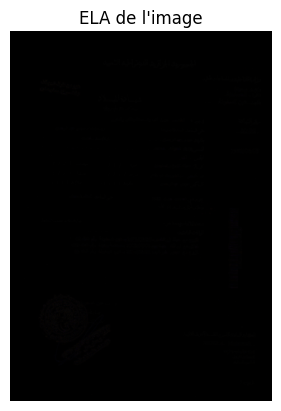

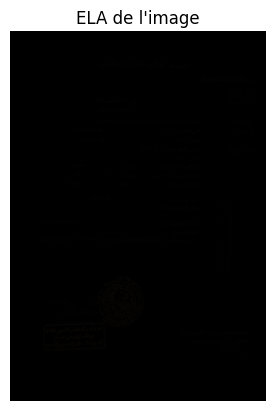

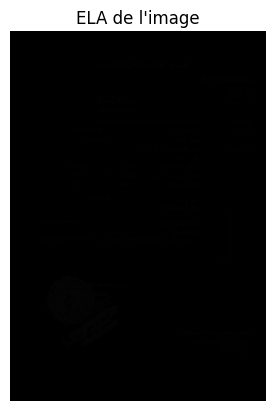

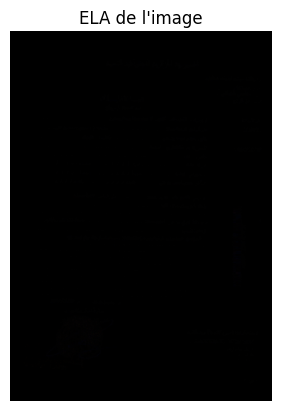

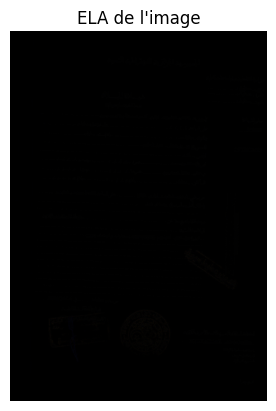

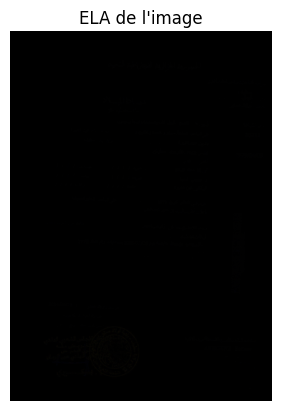

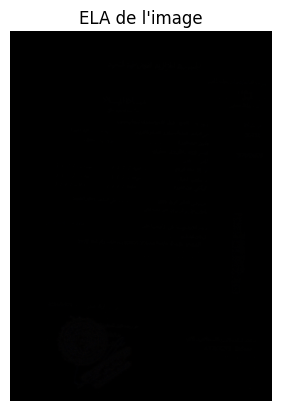

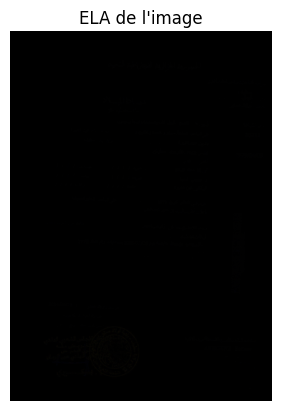

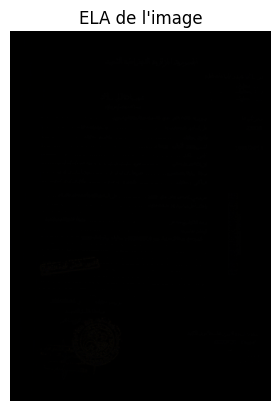

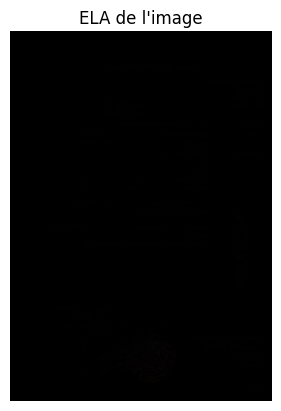

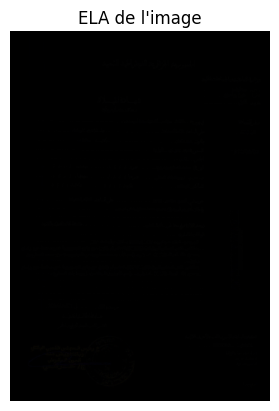

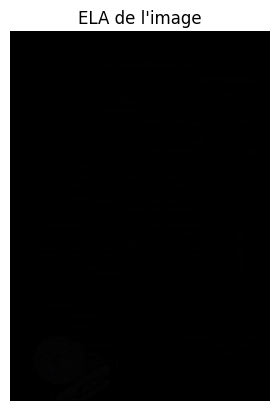

In [40]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def ela(image_path, quality=90):
    temp_filename = "temp.jpg"
    original_image = cv2.imread(image_path)
    cv2.imwrite(temp_filename, original_image, [cv2.IMWRITE_JPEG_QUALITY, quality])
    temp_image = cv2.imread(temp_filename)
    os.remove(temp_filename)
    ela_image = cv2.absdiff(original_image, temp_image)
    return ela_image

def visualize_ela(original_image_path, ela_image_path):
    # Charger les images
    original_image = cv2.imread(original_image_path)
    ela_image = cv2.imread(ela_image_path)

    # Afficher les images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Image originale")
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("ELA")
    plt.imshow(cv2.cvtColor(ela_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

# Chemin vers le dossier contenant les images
image_folder = r"C:\Users\berra\Desktop\Stage\images_extraits_suspects"

# Liste pour stocker les chemins complets des images
image_paths = []

# Parcourir le dossier et collecter les chemins des images
for filename in os.listdir(image_folder):
    if filename.endswith((".jpg", ".jpeg", ".png")):
        image_path = os.path.join(image_folder, filename)
        image_paths.append(image_path)

# Afficher les chemins des images
print("Chemins des images :")
for image_path in image_paths:
    print(image_path)

# Analyse ELA pour chaque image
for image_path in image_paths:
    ela_image = ela(image_path)
    plt.imshow(cv2.cvtColor(ela_image, cv2.COLOR_BGR2RGB))
    plt.title("ELA de l'image")
    plt.axis('off')
    plt.show()

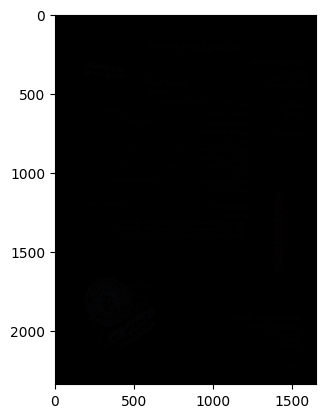

In [41]:
image_path = "C:/Users/berra/Desktop/Stage/images_extraits_suspects/birth_act (1)_1.jpg"
ela_image = ela(image_path)
plt.imshow(ela_image, cmap='gray')
plt.show()

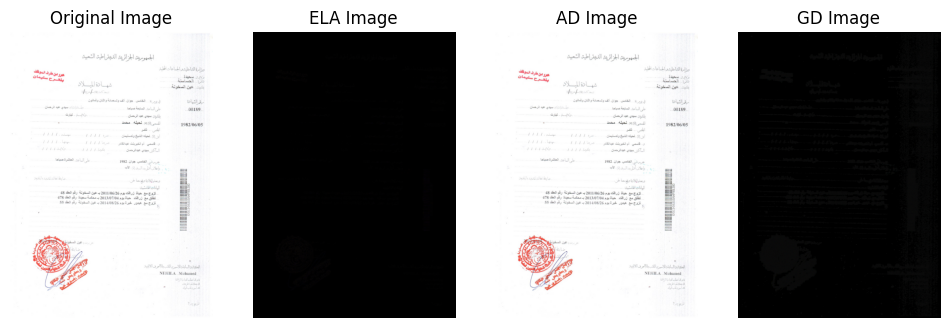

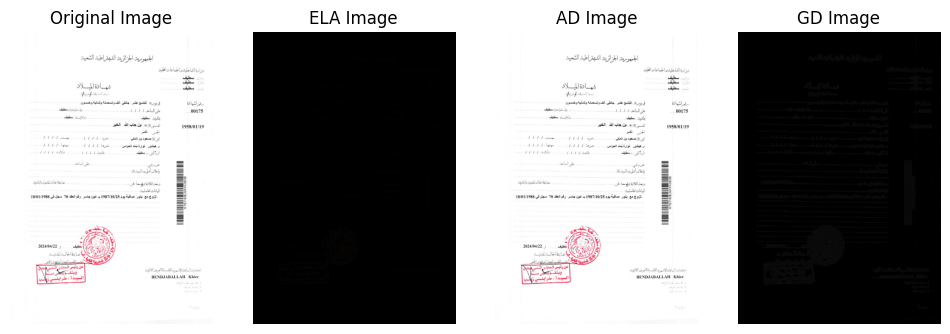

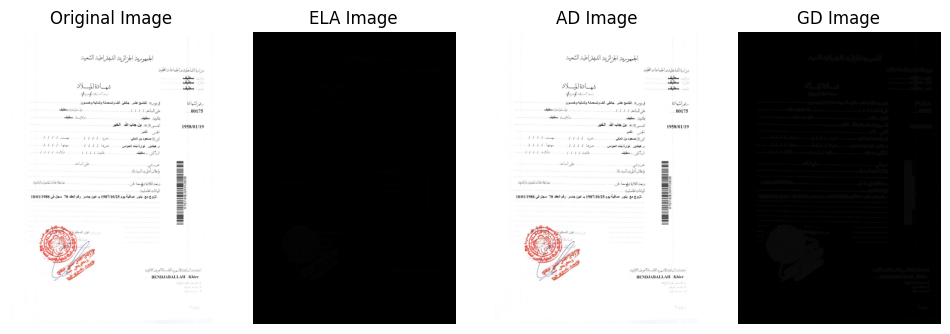

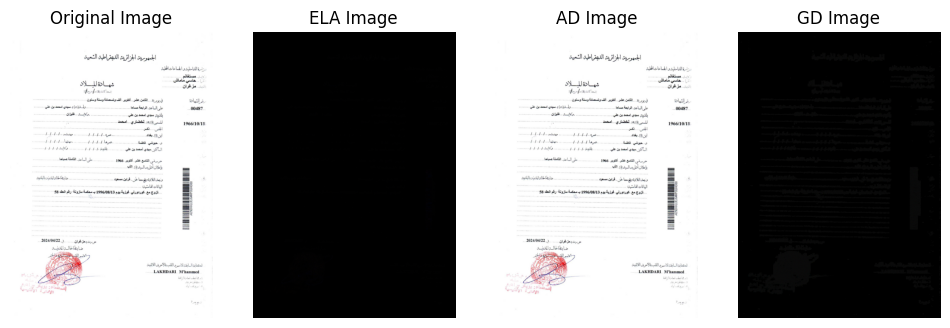

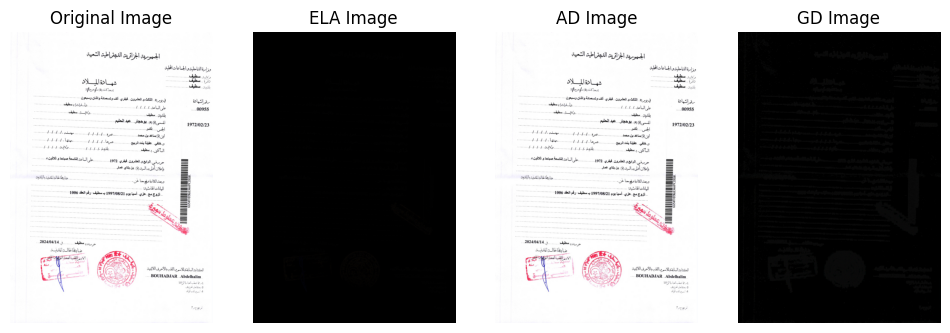

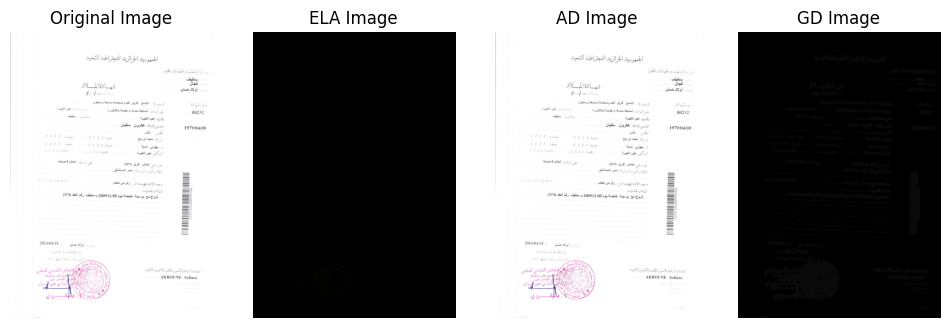

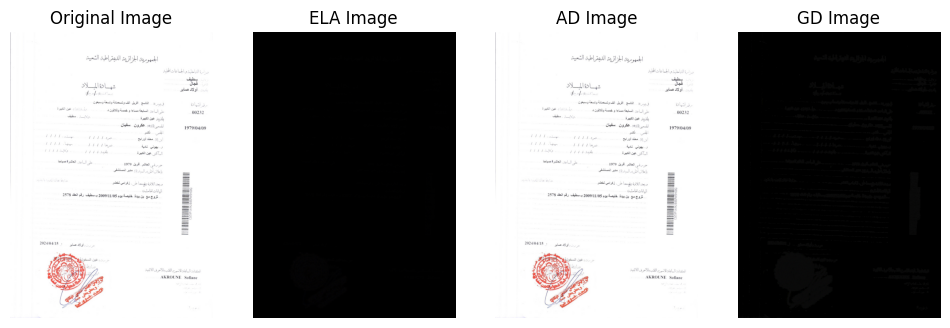

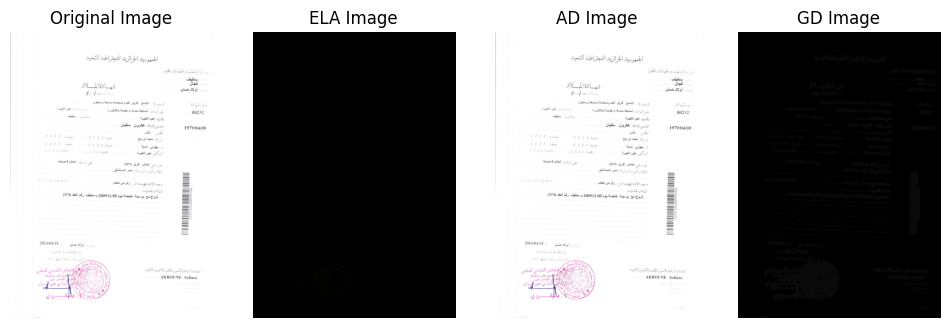

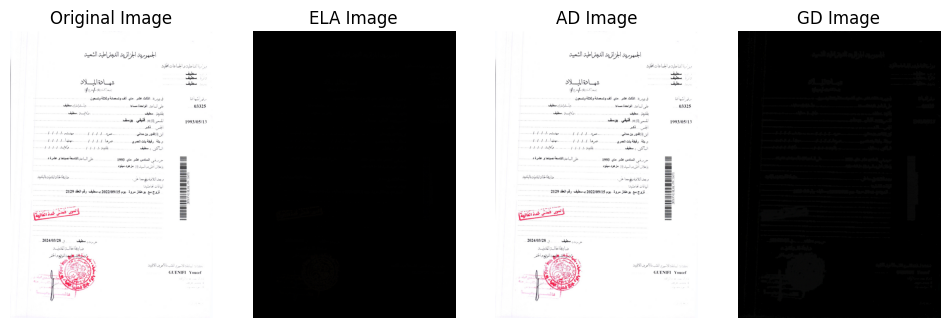

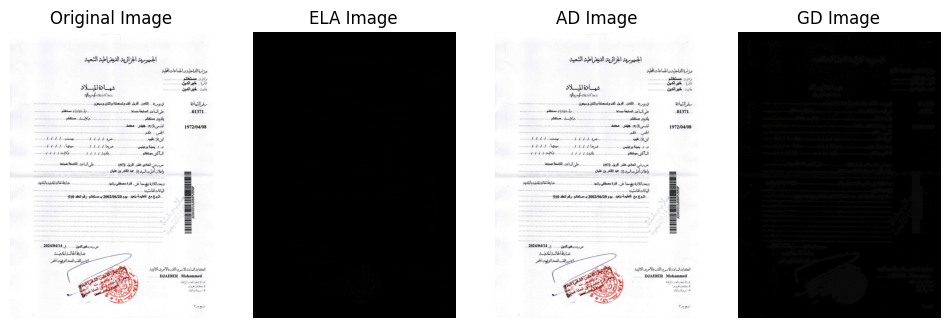

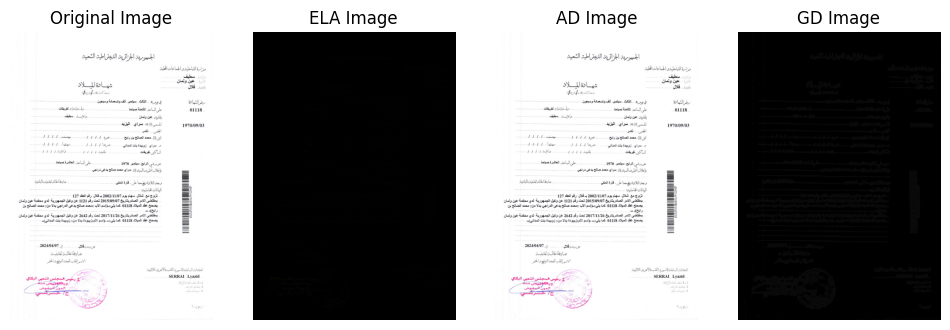

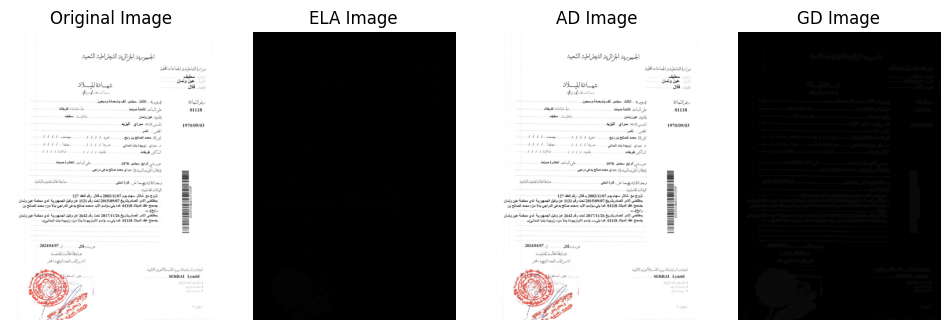

In [45]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from scipy.ndimage import gaussian_gradient_magnitude
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Fonction pour calculer l'ELA (Error Level Analysis)
def ela(image_path, quality=90):
    temp_filename = "temp.jpg"
    original_image = cv2.imread(image_path)
    cv2.imwrite(temp_filename, original_image, [cv2.IMWRITE_JPEG_QUALITY, quality])
    temp_image = cv2.imread(temp_filename)
    os.remove(temp_filename)
    ela_image = cv2.absdiff(original_image, temp_image)
    return ela_image

# Fonction pour calculer l'AD (Absolute Difference)
def ad(original_image, ela_image):
    ad_image = cv2.absdiff(original_image, ela_image)
    return ad_image

def gradient_difference(image_path):
    original_image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    sobelx = cv2.Sobel(gray_image,cv2.CV_64F,1,0,ksize=5)
    sobely = cv2.Sobel(gray_image,cv2.CV_64F,0,1,ksize=5)
    gd_image = np.sqrt(sobelx**2 + sobely**2)
    return gd_image

# Fonction pour visualiser les images
def visualize_images(original_image, ela_image, ad_image, gd_image):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 4, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    
    plt.subplot(1, 4, 2)
    plt.title("ELA Image")
    plt.imshow(cv2.cvtColor(ela_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    
    plt.subplot(1, 4, 3)
    plt.title("AD Image")
    plt.imshow(cv2.cvtColor(ad_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    
    plt.subplot(1, 4, 4)
    plt.title("GD Image")
    plt.imshow(gd_image, cmap='gray')
    plt.axis('off')
    
    plt.show()

# Chemin du dossier contenant les images suspects
image_folder = r"C:\Users\berra\Desktop\Stage\images_extraits_suspects"
images = []

# Parcourir le dossier pour charger les images
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(image_folder, filename)
        original_image = cv2.imread(image_path)
        ela_image = ela(image_path)
        ad_image = ad(original_image, ela_image)
        gd_image = gd(ad_image)
        visualize_images(original_image, ela_image, ad_image, gd_image)

In [60]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.layers import Input

# Instancier l'encodeur de label
label_encoder = LabelEncoder()

# Fonction pour charger les données à partir d'un dossier
def load_data(folder_path, image_size=(128, 128)):
    images = []
    labels = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)
            # Redimensionner l'image à la taille spécifiée
            image = cv2.resize(image, image_size)
            images.append(image)
            # Supposons que le label soit le premier mot avant '_'
            label = filename.split("_")[0]
            labels.append(label)
    
    # Convertir la liste d'images et de labels en tableaux numpy
    images = np.array(images)
    labels = np.array(labels)
    
    return images, labels

# Chemin vers le dossier contenant les images à charger
folder_path = r"C:\Users\berra\Desktop\Stage\images_extraits_suspects"

# Charger les images et les labels à partir du dossier spécifié
images, labels = load_data(folder_path)

# Encoder les étiquettes en nombres entiers
labels_encoded = label_encoder.fit_transform(labels)

# Enregistrer les classes dans un fichier numpy
np.save("classes.npy", label_encoder.classes_)

# Convertir les labels en format one-hot
labels_encoded = to_categorical(labels_encoded)

# Diviser les données en ensembles d'entraînement et de test
train_images, test_images, train_labels, test_labels = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

# Construire le modèle CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Modifier la dernière couche du modèle pour correspondre au nombre de classes
num_classes = len(np.unique(labels))
model.add(Dense(num_classes, activation='softmax'))

# Compiler le modèle avec binary_crossentropy
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10


C:\Users\berra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 42.9929 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 1.0000 - loss: 0.

In [62]:
import os
import cv2
import numpy as np
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder

# Charger le modèle pré-entraîné
model = load_model(r"C:\Users\berra\Desktop\Stage\modele_fraude.h5")

# Charger les étiquettes
label_encoder = LabelEncoder()
label_encoder.classes_ = np.load(r"C:\Users\berra\Desktop\Stage\classes.npy")

# Fonction pour charger les données à partir d'un dossier
def load_data(folder_path, image_size=(128, 128)):
    images = []
    filenames = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)
            # Redimensionner l'image à la taille spécifiée
            image = cv2.resize(image, image_size)
            images.append(image)
            filenames.append(filename)
    
    # Convertir la liste d'images en tableau numpy
    images = np.array(images)
    
    return images, filenames

# Chemin vers le dossier contenant les images à charger
folder_path = r"C:\Users\berra\Desktop\Stage\images_extraits_suspects"

# Charger les images à partir du dossier spécifié
images, filenames = load_data(folder_path)

# Effectuer les prédictions
predictions = model.predict(images)

# Convertir les prédictions en étiquettes
predicted_labels = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

# Afficher les résultats
for filename, predicted_label in zip(filenames, predicted_labels):
    print(f"Image : {filename}, Prédiction : {predicted_label}")

C:\Users\berra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
Image : birth_act (1)_1.jpg, Prédiction : birth
Image : birth_act (2)_1.jpg, Prédiction : birth
Image : birth_act (2)_11.jpg, Prédiction : birth
Image : birth_act (3)_1.jpg, Prédiction : birth
Image : birth_act (4)_1.jpg, Prédiction : birth
Image : birth_act (5)_1.jpg, Prédiction : birth
Image : birth_act (5)_11.jpg, Prédiction : birth
Image : birth_act (6)_1.jpg, Prédiction : birth
Image : birth_act (7)_1.jpg, Prédiction : birth
Image : birth_act (8)_1.jpg, Prédiction : birth
Image : birth_act (9)_1.jpg, Prédiction : birth
Image : birth_act (9)_11.jpg, Prédiction : birth
